In [89]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Step 2: Load and Preprocess Data
df = pd.read_csv('mail_data.csv')

In [91]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [93]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [94]:
df.shape

(5572, 2)

In [95]:
df.duplicated().sum()

415

In [96]:
df.drop_duplicates(inplace=True)

In [97]:

df.duplicated().sum()

0

In [98]:
df.shape

(5157, 2)

In [99]:
df.loc[df['Category'] == 'spam', 'Category',] = 1
df.loc[df['Category'] == 'ham', 'Category',] = 0

In [100]:
X = df['Message']
Y = df['Category']

In [101]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [102]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5157, dtype: object


In [103]:
# Step 3: Split Data into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [104]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [105]:
# Convert text data into numerical data
vectorizer = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_feature = vectorizer.fit_transform(X_train)
X_test_feature = vectorizer.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [106]:
print(X_train)

2598    Got fujitsu, ibm, hp, toshiba... Got a lot of ...
5418    So how are you really. What are you up to. How...
99                        I see a cup of coffee animation
2321        This pain couldn't have come at a worse time.
2388                               Also where's the piece
                              ...                        
4750    Thanx u darlin!im cool thanx. A few bday drink...
474     Want 2 get laid tonight? Want real Dogging loc...
3273    MOON has come to color your dreams, STARS to m...
4022                We have to pick rayan macleran there.
882     see, i knew giving you a break a few times wou...
Name: Message, Length: 4125, dtype: object


In [107]:
print(X_train_feature)

  (0, 3056)	0.3768666543151668
  (0, 2902)	0.37814533528523747
  (0, 3412)	0.3967833520562993
  (0, 3364)	0.3967833520562993
  (0, 6635)	0.3967833520562993
  (0, 4017)	0.27386074693036566
  (0, 4337)	0.33305955181924346
  (0, 5618)	0.23819775627179068
  (1, 5313)	0.55295106396087
  (1, 4170)	0.8332137306025039
  (2, 2034)	0.5724594631408114
  (2, 1800)	0.5474949662354052
  (2, 920)	0.6103600781566784
  (3, 4782)	0.4512908807267238
  (3, 1950)	0.5492646153275634
  (3, 1827)	0.3080655289837874
  (3, 7209)	0.5492646153275634
  (3, 6545)	0.31312766649238255
  (4, 4934)	1.0
  (5, 3461)	0.745570338992923
  (5, 2264)	0.6664269424430392
  (6, 3091)	0.16573762354288965
  (6, 4519)	0.16305124020026582
  (6, 4644)	0.20594833628441883
  (6, 2326)	0.47029719292723343
  :	:
  (4122, 4431)	0.3593480537173941
  (4123, 4926)	0.4041188590986093
  (4123, 5287)	0.646795156027331
  (4123, 4098)	0.646795156027331
  (4124, 1827)	0.11143718565621685
  (4124, 4291)	0.13752130457300116
  (4124, 4257)	0.19109918

In [108]:
# Step 4: Train and Evaluate Model
classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

In [109]:
for name, clf in classifiers.items():
    clf.fit(X_train_feature, Y_train)
    y_pred = clf.predict(X_test_feature)
    print(f'Classifier: {name}')
    print('Accuracy:', accuracy_score(Y_test, y_pred))
    print('Confusion Matrix:\n', confusion_matrix(Y_test, y_pred))
    print('Classification Report:\n', classification_report(Y_test, y_pred))
    print('-' * 50) #This line prints the separator


Classifier: SVM
Accuracy: 0.9796511627906976
Confusion Matrix:
 [[893   3]
 [ 18 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.87      0.92       136

    accuracy                           0.98      1032
   macro avg       0.98      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032

--------------------------------------------------
Classifier: Logistic Regression
Accuracy: 0.9525193798449613
Confusion Matrix:
 [[892   4]
 [ 45  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       0.96      0.67      0.79       136

    accuracy                           0.95      1032
   macro avg       0.95      0.83      0.88      1032
weighted avg       0.95      0.95      0.95      1032

--------------------------------------------------
Classi

In [110]:
model = SVC(kernel='linear', class_weight='balanced')
model.fit(X_train_feature, Y_train)
y_pred = model.predict(X_test_feature)

In [111]:
accuracy=accuracy_score(Y_test,y_pred)

In [112]:
print("accuracy=",accuracy)

accuracy= 0.9806201550387597


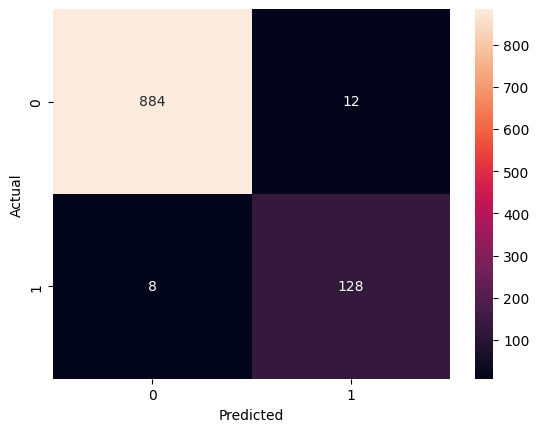

In [113]:
# Step 6: Visualize Results
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
# Step 7: Make Predictions on New Data
new_email = ["You won a free lottery ticket!"]
new_email_transformed = vectorizer.transform(new_email)
prediction = model.predict(new_email_transformed)
print("Spam" if prediction[0] == 1 else "Not Spam")

Spam


In [115]:
pip install joblib



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [116]:
import joblib

In [117]:

# Save the trained model to a joblib file
joblib.dump(model, 'spam_classifier_model.pkl')
# Save the TF-IDF vectorizer to a joblib file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']